In [11]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision = 3, suppress = True)

Generating data

In [25]:
gen_order = (3, 3)
a = [0, 0.22, -0.18, 0.08]
b = [0.5, 0.25, 0.25]

In [26]:
N = 100
v = np.random.randn(N+gen_order[1])

In [27]:
def make_series(a_coef, b_coef, order, N, noise):
    y = [0]*order[0]
    for k in range(N):
        y.append(
            a_coef[0] +
            sum([a_coef[j]*y[order[0]+k-j] for j in range(1, order[0]+1)]) +
            noise[order[1]+k] + 
            sum([b_coef[j-1]*noise[order[1]+k-j] for j in range(1, order[1]+1)])
        )
    return y[order[0]:]

In [28]:
y = make_series(a, b, gen_order, N, v)

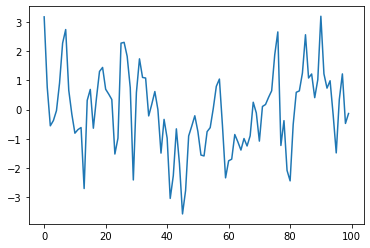

In [29]:
plt.plot(y)

МНК

In [30]:
def LS(X, y):
    return np.linalg.pinv(X.T @ X) @ X.T @ y

In [31]:
def create_X(y, v, ARMA = (3, 3)):
    N = min(len(y)-ARMA[0], len(v)-ARMA[1])
    X = np.zeros((N, 2+ARMA[0]+ARMA[1]))
    X[:, 0] = np.ones((N, ))
    for j in range(ARMA[0]):
        X[:, ARMA[0]-j] = y[j:N+j]
    for j in range(ARMA[1]+1):
        X[:, ARMA[0]+ARMA[1]-j+1] = v[j:N+j]
    return X

In [32]:
ARMA = (3, 3)
X = create_X(y, v[gen_order[1]:], ARMA)

In [34]:
X[:5]

array([[ 1.   , -0.557,  0.759,  3.164, -0.67 ,  0.031, -1.61 ,  2.743],
       [ 1.   , -0.377, -0.557,  0.759,  0.612, -0.67 ,  0.031, -1.61 ],
       [ 1.   , -0.04 , -0.377, -0.557,  0.74 ,  0.612, -0.67 ,  0.031],
       [ 1.   ,  0.901, -0.04 , -0.377,  1.736,  0.74 ,  0.612, -0.67 ],
       [ 1.   ,  2.267,  0.901, -0.04 ,  1.191,  1.736,  0.74 ,  0.612]])

In [35]:
res = LS(X, y[gen_order[0]:])
res[ARMA[1]+1] = 1

In [36]:
res

array([-0.  ,  0.22, -0.18,  0.08,  1.  ,  0.5 ,  0.25,  0.25])

In [45]:
print(b_new)
print(b)

[0.5  0.25 0.25]
[0.5, 0.25, 0.25]


In [44]:
a_new = res[:ARMA[0]+1]
b_new = res[ARMA[0]+2:]
y_new = make_series(a_new, b_new, ARMA, N, v)

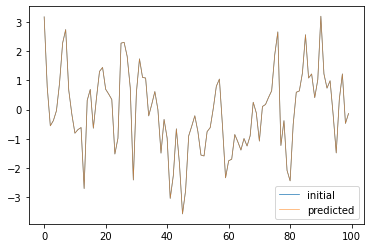

In [46]:
plt.plot(y, label = 'initial', lw = 0.7)
plt.plot(y_new, label = 'predicted', lw = 0.7, alpha = 0.7)
plt.legend()

In [96]:
np.linalg.norm(np.array(y[gen_order[0]:]) - np.array(y_new[ARMA[0]:]))

23.651090816617717